In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

# <center>Machine Learning Report</center>
### <center>Donato Meoli</center>

<center>Machine Learning course</center>
<center>Academic year: 2019/2020</center>

<center>Type of project: A with Computational Mathematics</center>

## Abstract

**OptiML**, for what about the ***ml*** module, is a sklearn compatible custom reimplementation of *Support Vector Machines* and *Deep Neural Networks*, both with some of the most successful features according to the state of art.

This work was motivated by the possibility of being able to solve the optimization problem deriving from the mathematical formulation of these models through a wide range of optimization algorithms object of study and developed for the Computational Mathematics course.

The scope of this report excludes the implementation details but is just to show the results over the *Monk's* classification problem and the *Grid Search* results over **ML-CUP19** regression problem. The latter refers to an academic competition within the Machine Learning course for which a **MEE** of **0.75** was achieved using a **Support Vector Regression** with **Laplacian kernel**.

The choice to train a SVR rather than any other models was dictated by my personal fascination about the versatility of the SVM formulation in such a differents ways. From the most immediate and simplest, i.e, as a *primal formulation* which gives rise to an unconstrained optimization problem, going from more complex and powerful formulation i.e, as a constrained quadratic optimization problem deriving from the *Wolfe dual* of the primal problem; up to formulations as constraints relaxation, e.g., as an unconstrained quadratic optimization problem deriving from the *Lagrangian bi-dual relaxation* of the constraints in the Wolfe dual.

For performance and efficiency reasons, the training phase over ML-CUP19 in the grid search was done with a custom reimplementation of the Platt's *Sequential Minimization Optimization* algorithm which is the best-known way to train a SVM in its *Wolfe dual* formulation, since it breaks up the original large QP problem into a series of smallest possible problems, which are then solved analytically.

## Monk's Problem

In this first section we are going to show firstly how the implementation of both, *Support Vector Machines* and *Neural Networks*, works correctly on Monk’s problem, used as a benchmark for the latter experiments.

### Support Vector Classifier

In case of *Support Vector Classifier* we are going to use an implementation that exploits the *Wolfe dual* formulation of the latter also to show the kernel trick usage. For what about the optimizer we can choose one method of those available: *SMO Classifier*, *Projected Gradient*, *Active Set*, *Interior Point* or *Frank Wolfe* method.

Alternatively, by specifying an unconstrained one, the *Wolfe dual* constraints will be relaxed into a *Lagrangian bi-dual* formulation.

In [2]:
import numpy as np

from optiml.ml.svm import DualSVC
from optiml.ml.svm.kernels import PolyKernel

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

#### Monk #1

In [3]:
from optiml.opti.constrained.bcqp import ProjectedGradient

X, y = fetch_openml('monks-problems-1', return_X_y=True)
y = y.astype(np.float32)

X_train = OneHotEncoder(sparse=False).fit_transform(X[:124,:])
X_test = OneHotEncoder(sparse=False).fit_transform(X[124:,:])
y_train, y_test = y[:124], y[124:]
    
svc = DualSVC(kernel=PolyKernel(degree=3, gamma='scale'), 
              optimizer=ProjectedGradient, verbose=50)
%time svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

iter	 cost		 gnorm
   0	 7.9073e+01	 5.5742e+01
  50	-1.5547e+01	 5.3673e-01
 100	-1.5677e+01	 1.1356e-01
 150	-1.5681e+01	 2.1759e-02
 200	-1.5681e+01	 7.6205e-03
 250	-1.5681e+01	 4.6279e-03
 300	-1.5681e+01	 2.9730e-03
 350	-1.5681e+01	 1.9492e-03
 400	-1.5681e+01	 1.2916e-03
 450	-1.5681e+01	 8.6154e-04
 500	-1.5681e+01	 5.7723e-04
 550	-1.5681e+01	 3.8794e-04
 600	-1.5681e+01	 2.6130e-04
 650	-1.5681e+01	 1.7628e-04
 700	-1.5681e+01	 1.1907e-04
 750	-1.5681e+01	 8.0492e-05
 800	-1.5681e+01	 5.4451e-05
 850	-1.5681e+01	 3.6853e-05
 900	-1.5681e+01	 2.4953e-05
 950	-1.5681e+01	 1.6900e-05
1000	-1.5681e+01	 1.1449e-05

CPU times: user 1.36 s, sys: 1.24 s, total: 2.61 s
Wall time: 374 ms
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       216
         1.0       1.00      1.00      1.00       216

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1

#### Monk #2

In [4]:
from optiml.opti.constrained.bcqp import InteriorPoint

X, y = fetch_openml('monks-problems-2', return_X_y=True)
y = y.astype(np.float32)

X_train = OneHotEncoder(sparse=False).fit_transform(X[:169,:])
X_test = OneHotEncoder(sparse=False).fit_transform(X[169:,:])
y_train, y_test = y[:169], y[169:]

svc = DualSVC(kernel=PolyKernel(degree=2, gamma='scale'), C=1000, 
              optimizer=InteriorPoint, verbose=2)
%time svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

iter	 cost		 p		 gap
   0	 1.4068e+08	-5.9510e+08	 5.2300e+00
   2	 4.5015e+07	-2.0051e+08	 5.4543e+00
   4	 3.3530e+07	-1.4648e+08	 5.3687e+00
   6	 2.0760e+07	-8.2561e+07	 4.9770e+00
   8	 8.7173e+06	-2.2264e+07	 3.5540e+00
  10	 5.8794e+06	-1.3959e+07	 3.3742e+00
  12	 4.0912e+06	-9.0070e+06	 3.2015e+00
  14	 2.7215e+06	-5.4478e+06	 3.0018e+00
  16	 1.3568e+06	-2.2504e+06	 2.6586e+00
  18	 4.1350e+05	-5.1320e+05	 2.2411e+00
  20	 7.4285e+04	-8.6965e+04	 2.1707e+00
  22	 4.3653e+03	-6.4911e+03	 2.4870e+00
  24	-1.2152e+02	-7.2317e+02	 4.9509e+00
  26	-2.9324e+02	-4.6093e+02	 5.7185e-01
  28	-3.5361e+02	-3.8804e+02	 9.7351e-02
  30	-3.7040e+02	-3.7063e+02	 6.1644e-04
  32	-3.7050e+02	-3.7050e+02	 1.8009e-08

CPU times: user 950 ms, sys: 836 ms, total: 1.79 s
Wall time: 264 ms
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       290
         1.0       1.00      1.00      1.00       142

    accuracy                           1.00     

#### Monk #3

In [5]:
from optiml.opti.constrained.bcqp import FrankWolfe

X, y = fetch_openml('monks-problems-3', return_X_y=True)
y = y.astype(np.float32)

X_train = OneHotEncoder(sparse=False).fit_transform(X[:122,:])
X_test = OneHotEncoder(sparse=False).fit_transform(X[122:,:])
y_train, y_test = y[:122], y[122:]

svc = DualSVC(kernel=PolyKernel(degree=4, gamma='auto'), C=100, 
              optimizer=FrankWolfe, verbose=50)
%time svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

iter	 cost		 lb		 gap
   0	-1.2344e+00	-7.4695e+03	 6.0501e+03
  50	-2.6165e+03	-2.6971e+03	 3.0785e-02
 100	-2.6334e+03	-2.6732e+03	 1.5100e-02
 150	-2.6396e+03	-2.6663e+03	 1.0129e-02
 200	-2.6428e+03	-2.6644e+03	 8.1795e-03
 250	-2.6448e+03	-2.6624e+03	 6.6527e-03
 300	-2.6464e+03	-2.6604e+03	 5.3150e-03
 350	-2.6474e+03	-2.6596e+03	 4.6133e-03
 400	-2.6483e+03	-2.6591e+03	 4.1114e-03
 450	-2.6489e+03	-2.6582e+03	 3.5144e-03
 500	-2.6494e+03	-2.6582e+03	 3.3163e-03
 550	-2.6499e+03	-2.6580e+03	 3.0870e-03
 600	-2.6502e+03	-2.6579e+03	 2.9153e-03
 650	-2.6505e+03	-2.6573e+03	 2.5423e-03
 700	-2.6508e+03	-2.6570e+03	 2.3253e-03
 750	-2.6510e+03	-2.6570e+03	 2.2340e-03
 800	-2.6513e+03	-2.6565e+03	 1.9812e-03
 850	-2.6514e+03	-2.6565e+03	 1.9139e-03
 900	-2.6516e+03	-2.6565e+03	 1.8530e-03
 950	-2.6517e+03	-2.6565e+03	 1.7973e-03
1000	-2.6519e+03	-2.6565e+03	 1.7461e-03

CPU times: user 672 ms, sys: 548 ms, total: 1.22 s
Wall time: 179 ms
              precision    recall  f1-score   s

### Neural Network Classifier

In case of *Neural Network Classifier* we are going to use different optimizers, both *stochastic* and *line search* methods, with different loss functions.

In [8]:
import numpy as np

from optiml.ml.neural_network import NeuralNetworkClassifier
from optiml.ml.neural_network.layers import FullyConnected

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

#### Monk #1

epoch	iter	 cost	
   0	   0	 1.2770e-01 - val_loss:  1.3173e-01 - acc:  0.3636 - val_acc:  0.4000
  50	  50	 9.1764e-02 - val_loss:  1.0128e-01 - acc:  0.7778 - val_acc:  0.8000
 100	 100	 6.8131e-02 - val_loss:  7.8682e-02 - acc:  0.8586 - val_acc:  0.8400
 150	 150	 5.5948e-02 - val_loss:  7.6560e-02 - acc:  0.8889 - val_acc:  0.8400
 200	 200	 4.1959e-02 - val_loss:  6.6627e-02 - acc:  0.9091 - val_acc:  0.8400
 250	 250	 2.7093e-02 - val_loss:  4.8443e-02 - acc:  0.9798 - val_acc:  0.8000
 300	 300	 1.3102e-02 - val_loss:  1.9715e-02 - acc:  1.0000 - val_acc:  1.0000
 350	 350	 7.2087e-03 - val_loss:  9.8920e-03 - acc:  1.0000 - val_acc:  1.0000
 400	 400	 4.9061e-03 - val_loss:  6.9795e-03 - acc:  1.0000 - val_acc:  1.0000
 450	 450	 3.6314e-03 - val_loss:  5.4998e-03 - acc:  1.0000 - val_acc:  1.0000
 500	 500	 2.8230e-03 - val_loss:  4.6019e-03 - acc:  1.0000 - val_acc:  1.0000
 550	 550	 2.2729e-03 - val_loss:  4.0025e-03 - acc:  1.0000 - val_acc:  1.0000
 600	 600	 1.8801e-03 

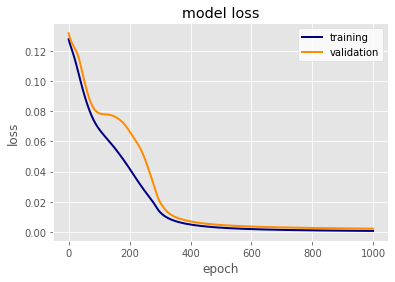

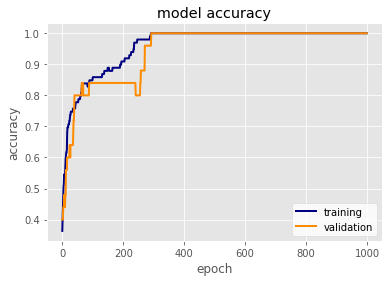

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       216
         1.0       1.00      1.00      1.00       216

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



In [21]:
from optiml.ml.neural_network.activations import sigmoid
from optiml.ml.neural_network.losses import mean_squared_error
from optiml.ml.utils import plot_model_loss, plot_model_accuracy
from optiml.opti.unconstrained.stochastic import Adam

X, y = fetch_openml('monks-problems-1', return_X_y=True)
y = y.astype(np.float32)

X_train = OneHotEncoder(sparse=False).fit_transform(X[:124,:])
X_test = OneHotEncoder(sparse=False).fit_transform(X[124:,:])
y_train, y_test = y[:124], y[124:]

net = NeuralNetworkClassifier((FullyConnected(17, 5, sigmoid),
                               FullyConnected(5, 1, sigmoid)),
                              loss=mean_squared_error, optimizer=Adam, 
                              learning_rate_init=0.01, early_stopping=False, 
                              validation_split=0.2, max_iter=1000, verbose=50)
%time net.fit(X_train, y_train)
plot_model_loss(net.train_loss_history, net.val_loss_history)
plot_model_accuracy(net.train_score_history, net.val_score_history)
print(classification_report(y_test, net.predict(X_test)))

### Monk #2

epoch	iter	 cost	
   0	   0	 4.3892e-01 - val_loss:  4.1438e-01 - acc:  0.3704 - val_acc:  0.4118
  50	  50	 3.1517e-01 - val_loss:  3.5995e-01 - acc:  0.6444 - val_acc:  0.5882
 100	 100	 3.0686e-01 - val_loss:  3.7904e-01 - acc:  0.6889 - val_acc:  0.5294
 150	 150	 2.9338e-01 - val_loss:  3.6752e-01 - acc:  0.7111 - val_acc:  0.5294
 200	 200	 2.5904e-01 - val_loss:  3.3717e-01 - acc:  0.7481 - val_acc:  0.5882
 250	 250	 2.2182e-01 - val_loss:  3.0738e-01 - acc:  0.8000 - val_acc:  0.6176
 300	 300	 1.8880e-01 - val_loss:  2.7413e-01 - acc:  0.8296 - val_acc:  0.6471
 350	 350	 1.4484e-01 - val_loss:  2.1164e-01 - acc:  0.9037 - val_acc:  0.7647
 400	 400	 8.7992e-02 - val_loss:  1.2923e-01 - acc:  0.9926 - val_acc:  0.9412
 450	 450	 4.8503e-02 - val_loss:  7.2739e-02 - acc:  1.0000 - val_acc:  1.0000
 500	 500	 2.9565e-02 - val_loss:  4.4858e-02 - acc:  1.0000 - val_acc:  1.0000
 550	 550	 2.0309e-02 - val_loss:  3.1028e-02 - acc:  1.0000 - val_acc:  1.0000
 600	 600	 1.5177e-02 

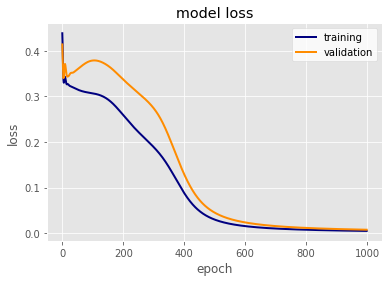

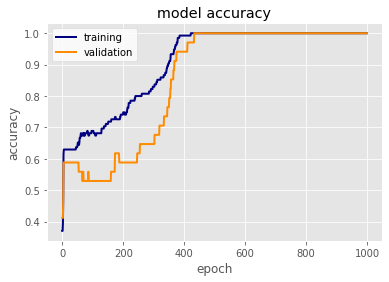

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       290
         1.0       1.00      1.00      1.00       142

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



In [51]:
from optiml.ml.neural_network.activations import sigmoid, softmax
from optiml.ml.neural_network.losses import sparse_categorical_cross_entropy

from optiml.opti.unconstrained.stochastic import StochasticGradientDescent

X, y = fetch_openml('monks-problems-2', return_X_y=True)
y = y.astype(np.float32)

X_train = OneHotEncoder(sparse=False).fit_transform(X[:169,:])
X_test = OneHotEncoder(sparse=False).fit_transform(X[169:,:])
y_train, y_test = y[:169], y[169:]

net = NeuralNetworkClassifier((FullyConnected(17, 5, sigmoid),
                               FullyConnected(5, 2, softmax)),
                              loss=sparse_categorical_cross_entropy, optimizer=StochasticGradientDescent, 
                              learning_rate_init=0.1, momentum_type='nesterov', momentum=0.9, 
                              early_stopping=False, validation_split=0.2,max_iter=1000, verbose=50)
%time net.fit(X_train, y_train)
plot_model_loss(net.train_loss_history, net.val_loss_history)
plot_model_accuracy(net.train_score_history, net.val_score_history)
print(classification_report(y_test, net.predict(X_test)))

#### Monk #3

In [11]:
from optiml.ml.neural_network.activations import sigmoid, softmax
from optiml.ml.neural_network.losses import mean_squared_error
from optiml.ml.neural_network.regularizers import L2

from optiml.opti.unconstrained.line_search import BFGS

from optiml.opti.unconstrained.stochastic import Adam

X, y = fetch_openml('monks-problems-3', return_X_y=True)
y = y.astype(np.float32)

X_train = OneHotEncoder(sparse=False).fit_transform(X[:122,:])
X_test = OneHotEncoder(sparse=False).fit_transform(X[122:,:])
y_train, y_test = y[:122], y[122:]

net = NeuralNetworkClassifier((FullyConnected(17, 10, sigmoid, coef_reg=L2(0.1), inter_reg=L2(0.1)),
                               FullyConnected(10, 1, sigmoid, coef_reg=L2(0.1), inter_reg=L2(0.1))),
                              loss=mean_squared_error, optimizer=BFGS, max_iter=500, verbose=15)
%time net.fit(X_train, y_train)
print(classification_report(y_test, net.predict(X_test)))

iter	feval	 cost		 gnorm		ls	it	 astar		 rho
   0	   1	 1.3559e-01	 4.6867e-02	 1	 0	 1.0000e+00	 2.6765e+03
  15	  37	 5.0942e-02	 6.2854e-03	 1	 0	 1.0000e+00	 5.5044e+04
  30	  52	 4.7396e-02	 6.1732e-03	 1	 0	 1.0000e+00	 6.7550e+03
  45	  67	 4.6134e-02	 1.6463e-03	 1	 0	 1.0000e+00	 2.0684e+04
  60	  82	 4.5980e-02	 7.8643e-04	 1	 0	 1.0000e+00	 7.4551e+04
  75	  97	 4.5909e-02	 3.4846e-04	 1	 0	 1.0000e+00	 6.0017e+05
  90	 112	 4.5854e-02	 3.5828e-04	 1	 0	 1.0000e+00	 4.8087e+06
 105	 127	 4.5817e-02	 2.8841e-04	 1	 0	 1.0000e+00	 9.8871e+05
 120	 142	 4.5796e-02	 2.5165e-04	 1	 0	 1.0000e+00	 3.1378e+05
 135	 157	 4.5769e-02	 2.8252e-04	 1	 0	 1.0000e+00	 1.4013e+06
 150	 172	 4.5734e-02	 2.1271e-04	 1	 0	 1.0000e+00	 1.3097e+06
 165	 187	 4.5722e-02	 1.8805e-04	 1	 0	 1.0000e+00	 2.5563e+06
 180	 202	 4.5714e-02	 1.0427e-04	 1	 0	 1.0000e+00	 1.1706e+08
 195	 217	 4.5710e-02	 7.3019e-05	 1	 0	 1.0000e+00	 4.1918e+06
 210	 232	 4.5709e-02	 4.7000e-05	 1	 0	 1.0000e+00	 7.1444

## ML-CUP19

In this second section of the report we are going to show how to perform the grid search over ML-CUP19 to find the hyperparameters which best generalize the model on the unseen data.

In [14]:
import numpy as np

def load_ml_cup():
    ml_cup = np.delete(np.genfromtxt(module_path + '/optiml/ml/data/ML-CUP19/ML-CUP19-TR.csv', delimiter=','), obj=0, axis=1)
    return ml_cup[:, :-2], ml_cup[:, -2:]

def load_ml_cup_blind():
    return np.delete(np.genfromtxt(module_path + '/optiml/ml/data/ML-CUP19/ML-CUP19-TS.csv', delimiter=','), obj=0, axis=1)

In [15]:
def mean_euclidean_error(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    return np.mean(np.linalg.norm(y_pred - y_true, axis=y_true.ndim - 1))  # for multi-output compatibility

The hyperparameters which needs to be tuned are the kernel, the $\epsilon$-insensitive value of the loss function, the regularization term $C$ and $\gamma$ which define how far the influence of a single training example reaches.

The range of values was chosen as follows:

In [14]:
from optiml.ml.svm.kernels import gaussian, laplacian

kernel_range = [gaussian, laplacian]
epsilon_range = [0.001, 0.01, 0.1, 0.2, 0.3]
C_range = [1, 10, 100, 1000]
gamma_range = [1e-8, 1e-6, 1e-4, 1e-2]

In [3]:
from optiml.ml.utils import plot_validation_curve, plot_learning_curve
from optiml.ml.svm import DualSVR

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor

X, y = load_ml_cup()

tuned_parameters = {'estimator__kernel': kernel_range,
                    'estimator__epsilon': epsilon_range,
                    'estimator__C': C_range,
                    'estimator__kernel__gamma': gamma_range}

grid = GridSearchCV(MultiOutputRegressor(DualSVR()),
                    param_grid=tuned_parameters,
                    scoring=make_scorer(mean_euclidean_error, greater_is_better=False),
                    cv=5,  # 5 fold cross validation
                    n_jobs=-1,  # use all processors
                    refit=True,  # refit the best model on the full dataset
                    verbose=True)
grid.fit(X, y)
print(f'best parameters: {grid.best_params_}')
print(f'best score: {-grid.best_score_}')

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  8.0min finished


best parameters: {'estimator__C': 100, 'estimator__epsilon': 0.001, 'estimator__gamma': 1e-08, 'estimator__kernel': <function laplacian_kernel at 0x7f8b7fa5d3a0>}
best score: 0.7489511761793546


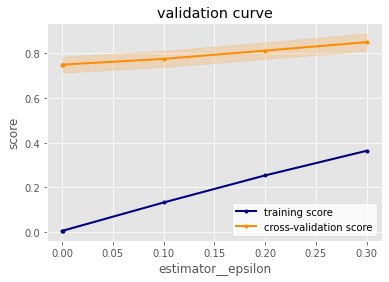

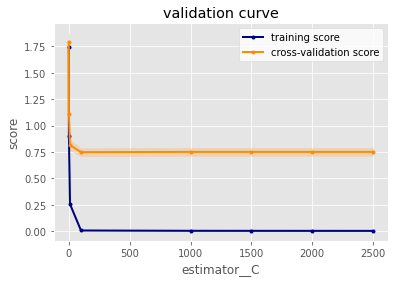

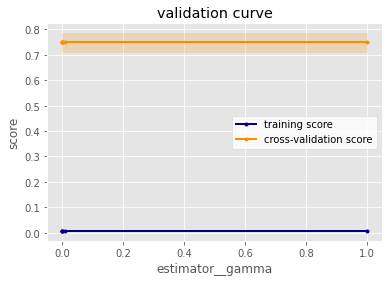

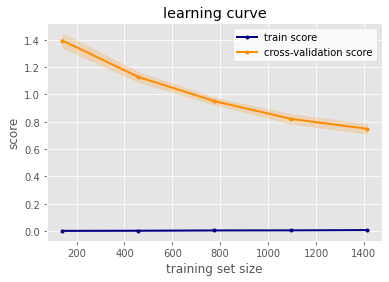

In [2]:
scorer = make_scorer(mean_euclidean_error)

# plot validation curve to visualize the performance metric over a
# range of values for some hyperparameters (C, gamma, epsilon, etc.)
plot_validation_curve(grid.best_estimator_, X, y, 'estimator__epsilon', epsilon_range, scorer)
plot_validation_curve(grid.best_estimator_, X, y, 'estimator__C', C_range, scorer)
plot_validation_curve(grid.best_estimator_, X, y, 'estimator__kernel__gamma', gamma_range, scorer)

# plot learning curve to visualize the effect of the
# number of observations on the performance metric
plot_learning_curve(grid.best_estimator_, X, y, scorer)

In [ ]:
# save predictions on the blind test set
np.savetxt(module_path + '/optiml/ml/data/ML-CUP19/dmeoli_ML-CUP19-TS.csv', grid.predict(load_ml_cup_blind()), delimiter=',')